In [1]:
# Initial imports
import os
import pandas as pd
from pprint import pprint
import nltk
from newsapi import NewsApiClient
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jiwookkim/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy", page_size=100)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin['totalResults']}")

bitcoin['articles'][0]

Total articles about Bitcoin: 4306


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Laura Mallonee',
 'title': 'Inside the Icelandic Facility Where Bitcoin Is Mined',
 'description': "Cryptocurrency mining now uses more of the Nordic island nation's electricity than its homes.",
 'url': 'https://www.wired.com/story/iceland-bitcoin-mining-gallery/',
 'urlToImage': 'https://media.wired.com/photos/5dbc37a4c955950008b26751/191:100/w_1280,c_limit/photo_barnard_explosions_4.jpg',
 'publishedAt': '2019-11-03T15:00:00Z',
 'content': 'Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars]'}

In [6]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy", page_size=100)

print(f"Total articles about Ethereum: {ethereum['totalResults']}")

Total articles about Ethereum: 919


In [7]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "text": text,
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df

,Compound,Negative,Neutral,Positive,text
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...
1,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...
3,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
4,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...
...,...,...,...,...,...
92,0.0000,0.000,1.000,0.000,Bitcoin prices have quietly been in meltdown m...
93,0.1531,0.037,0.911,0.051,Illustration by Stephen Shankland/CNET\r\nAfte...
94,0.2023,0.047,0.887,0.067,After seeing its IPO dreams slashed earlier th...
95,-0.7140,0.184,0.736,0.080,"I hate to be the bearer of bad news, but victi..."


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "text": text,
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df

,Compound,Negative,Neutral,Positive,text
0,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
1,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...
2,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...
3,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know..."
4,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...
...,...,...,...,...,...
91,-0.5423,0.106,0.894,0.000,A Spanish financial watchdog has issued a warn...
92,0.3818,0.000,0.936,0.064,Noelle Acheson is a veteran of company analysi...
93,0.0000,0.000,1.000,0.000,"Bitski, a developer-focused blockchain wallet ..."
94,0.8221,0.000,0.798,0.202,"Ethereum co-founder and founder of Consensys, ..."


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,97.000000,97.000000,97.000000,97.000000
mean,0.145687,0.039804,0.899031,0.061186
std,0.439850,0.054928,0.075462,0.053192
min,-0.831600,0.000000,0.640000,0.000000
25%,-0.102700,0.000000,0.857000,0.000000
50%,0.177900,0.000000,0.926000,0.066000
75%,0.507000,0.068000,0.945000,0.087000
max,0.914100,0.271000,1.000000,0.249000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.178518,0.026906,0.916385,0.056698
std,0.410332,0.048792,0.072458,0.055863
min,-0.877900,0.000000,0.551000,0.000000
25%,0.000000,0.000000,0.889500,0.000000
50%,0.250000,0.000000,0.930000,0.057000
75%,0.502100,0.045250,0.958000,0.098500
max,0.822100,0.287000,1.000000,0.239000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin with 0.061186

Q: Which coin had the highest compound score?

A: bitcoin

Q. Which coin had the highest positive score?

A: bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")

    # Remove the punctuation
    re_clean = regex.sub('', text)
    
    # Remove the stop words
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = ', '.join([lemmatizer.lemmatize(word) for word in words])
   
    return tokens


In [14]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...,"Less, than, two, mile, from, Icelands, Reykjav..."
1,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,"At, least, thats, the, idea, While, it, not, a..."
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...,"High, school, student, in, France, may, be, am..."
3,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"TLDR, The, indepth, Complete, Blockchain, and,..."
4,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...,"Our, robot, colleague, Satoshi, Nakaboto, writ..."
...,...,...,...,...,...,...
92,0.0000,0.000,1.000,0.000,Bitcoin prices have quietly been in meltdown m...,"Bitcoin, price, have, quietly, been, in, meltd..."
93,0.1531,0.037,0.911,0.051,Illustration by Stephen Shankland/CNET\r\nAfte...,"Illustration, by, Stephen, ShanklandCNETAfter,..."
94,0.2023,0.047,0.887,0.067,After seeing its IPO dreams slashed earlier th...,"After, seeing, it, IPO, dream, slashed, earlie..."
95,-0.7140,0.184,0.736,0.080,"I hate to be the bearer of bad news, but victi...","I, hate, to, be, the, bearer, of, bad, news, b..."


In [15]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df

,Compound,Negative,Neutral,Positive,text,tokens
0,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"TLDR, The, indepth, Complete, Blockchain, and,..."
1,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...,"Disrupt, Berlin, is, right, around, the, corne..."
2,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,"At, least, thats, the, idea, While, it, not, a..."
3,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know...","he, plaBy, now, you, should, almost, certainly..."
4,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...,"Blockchain, ha, been, picking, up, the, pace, ..."
...,...,...,...,...,...,...
91,-0.5423,0.106,0.894,0.000,A Spanish financial watchdog has issued a warn...,"A, Spanish, financial, watchdog, ha, issued, a..."
92,0.3818,0.000,0.936,0.064,Noelle Acheson is a veteran of company analysi...,"Noelle, Acheson, is, a, veteran, of, company, ..."
93,0.0000,0.000,1.000,0.000,"Bitski, a developer-focused blockchain wallet ...","Bitski, a, developerfocused, blockchain, walle..."
94,0.8221,0.000,0.798,0.202,"Ethereum co-founder and founder of Consensys, ...","Ethereum, cofounder, and, founder, of, Consens..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
import os
from path import Path
import pandas as pd
import numpy as np
import hvplot.pandas
import nltk
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
from ibm_watson import ToneAnalyzerV3
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
import panel as pn



import nltk, re, string, collections
from collections import Counter
from nltk import ngrams
from nltk.collocations import *
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
# Generate the Bitcoin N-grams where N=2
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(bitcoin_df['tokens'])
words = vectorizer.get_feature_names()
words_df = pd.DataFrame(
    list(zip(words, np.ravel(X.sum(axis=0)))), columns=["Word", "Frequency"]
)

words_df.sort_values(by="Frequency", ascending=False, inplace=True)

words_df = words_df.set_index('Word')
words_df.head(10)

,Frequency
Word,
satoshi nakaboto,38
bitcoin btc,25
past hour,19
fucking daywelcome,19
nakaboto writes,19
nakaboto tell,19
edition bitcoin,19
tell whats,19
daywelcome edition,19


In [24]:
# Generate the Ethereum N-grams where N=2
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(ethereum_df['tokens'])
words = vectorizer.get_feature_names()

words_df_2 = pd.DataFrame(
    list(zip(words, np.ravel(X.sum(axis=0)))), columns=["Word", "Frequency"]
)

words_df_2.sort_values(by="Frequency", ascending=False, inplace=True)

words_df_2 = words_df_2.set_index('Word')
words_df_2.head(10)

,Frequency
Word,
early morning,11
ethereum ended,10
ended day,9
morning intraday,9
saw ethereum,9
day saw,8
start day,8
intraday high,7
ethereum cofounder,5


In [25]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [28]:
# Get the top 10 words for Bitcoin
vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english')
X = vectorizer.fit_transform(bitcoin_df['tokens'])
words = vectorizer.get_feature_names()
words_df = pd.DataFrame(
    list(zip(words, np.ravel(X.sum(axis=0)))), columns=["Word", "Frequency"]
)

words_df.sort_values(by="Frequency", ascending=False, inplace=True)

words_df = words_df.set_index('Word')
top_10_btc = words_df.head(10)

,Frequency
Word,
bitcoin,99
char,96
satoshi,41
nakaboto,38
satoshi nakaboto,38
cryptocurrency,30
ha,28
btc,27
bitcoin btc,25


In [29]:
# Get the top 10 words for Ethereum
vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english')
X = vectorizer.fit_transform(ethereum_df['text'])
words = vectorizer.get_feature_names()

words_df = pd.DataFrame(
    list(zip(words, np.ravel(X.sum(axis=0)))), columns=["Word", "Frequency"]
)

words_df.sort_values(by="Frequency", ascending=False, inplace=True)

words_df = words_df.set_index('Word')
top_10_ethereum = words_df.head(10)

,Frequency
Word,
ethereum,97
chars,96
li,39
bitcoin,34
blockchain,33
day,24
cryptocurrency,21
morning,17
price,14


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [31]:
# Generate the Bitcoin word cloud
corpus_btc = bitcoin_df['tokens'].str.cat(sep=', ')
corpus_eth = ethereum_df['tokens'].str.cat(sep=', ')

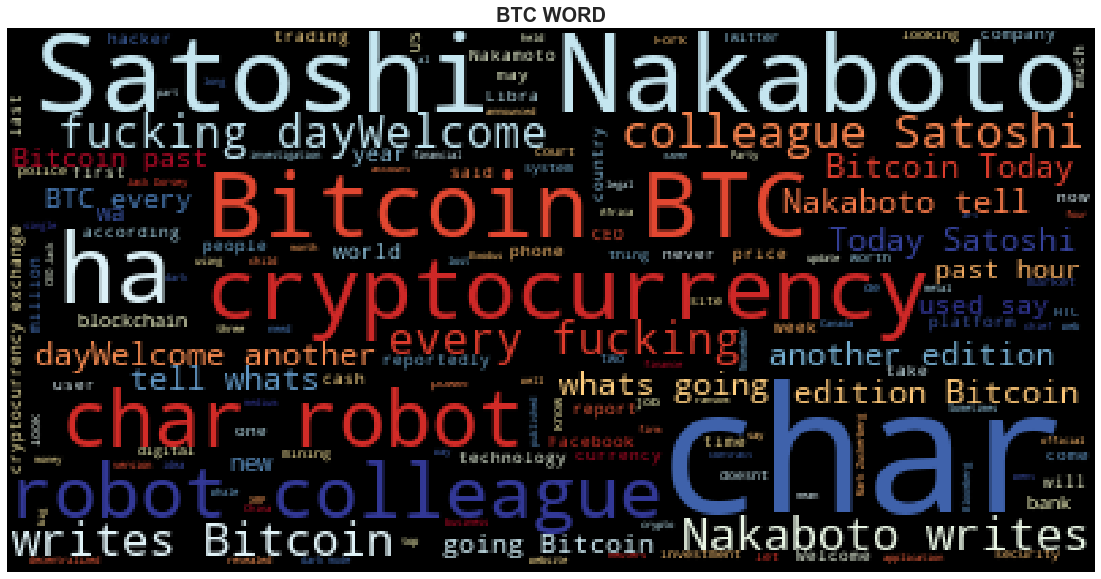

In [32]:
# Generate the Ethereum word cloud
wc = WordCloud(colormap='RdYlBu').generate(corpus_btc)
fig_bow_cloud = plt.figure()
plot_bow_cloud = plt.imshow(wc)
plot_bow_cloud = plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plot_bow_cloud = plt.title("BTC WORD", fontdict=fontdict)
plot_bow_cloud = plt.show()
plt.close(fig_bow_cloud)

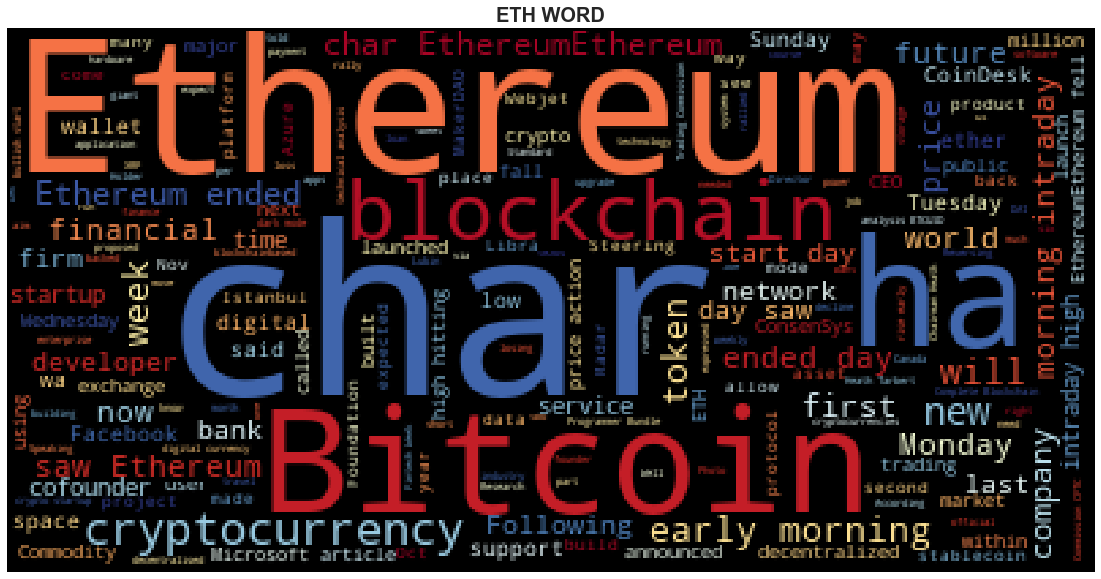

In [33]:

wc = WordCloud(colormap='RdYlBu').generate(corpus_eth)
fig_bow_cloud = plt.figure()
plot_bow_cloud = plt.imshow(wc)
plot_bow_cloud = plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plot_bow_cloud = plt.title("ETH WORD", fontdict=fontdict)
plot_bow_cloud = plt.show()
plt.close(fig_bow_cloud)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [89]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [90]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [91]:
# Concatenate all of the bitcoin text together
btc_concat = bitcoin_df['text'].str.cat(sep=', ')

In [ ]:
# Run the NER processor on all of the text
doc = nlp(btc_concat)
displacy.render(doc, style='ent')
# Add a title to the document
doc.user_data["title"] = "BTC"

In [ ]:
# Render the visualization

In [ ]:
# List all Entities
pprint([(ent.text, ent.label_) for ent in doc.ents])

---

## Ethereum NER

In [113]:
# Concatenate all of the bitcoin text together
eth_concat = ethereum_df['text'].str.cat(sep=', ')

In [1]:
# Run the NER processor on all of the text
doc = nlp(eth_concat)
displacy.render(doc, style='ent')
# Add a title to the document
doc.user_data["title"] = "ETH"

NameError: name 'nlp' is not defined

In [115]:
# Render the visualization
pprint([(ent.text, ent.label_) for ent in doc.ents])

[('Complete Blockchain and Ethereum Programmer', 'ORG'),
 ('just $24', 'MONEY'),
 ('Bitcoin', 'PERSON'),
 ('Disrupt Berlin', 'PERSON'),
 ('December 11 and December 12', 'DATE'),
 ('Bitcoin', 'PERSON'),
 ('HTC', 'ORG'),
 ('second', 'ORDINAL'),
 ('the year 2009', 'DATE'),
 ('Santoshi Nakamoto', 'PERSON'),
 ('Nakamoto', 'PERSON'),
 ('Bitcoin', 'PERSON'),
 ('Blockchai', 'GPE'),
 ('Reuters', 'ORG'),
 ('Bitcoin', 'PERSON'),
 ('as much as 9%', 'PERCENT'),
 ('Wednesday', 'DATE'),
 ('June', 'DATE'),
 ('Facebook', 'ORG'),
 ("Mark Zuckerberg's", 'PERSON'),
 ('Libra', 'GPE'),
 ('Zuckerberg', 'GPE'),
 ('Swiss', 'NORP'),
 ('countrys', 'NORP'),
 ('Swiss', 'NORP'),
 ('Block', 'ORG'),
 ('The Royal Bank of Canada', 'ORG'),
 ('Last week', 'DATE'),
 ('Canadian', 'NORP'),
 ('The Royal Bank of Canada', 'ORG'),
 ('Opera', 'ORG'),
 ('one', 'CARDINAL'),
 ('Opera Mobile', 'ORG'),
 ('the day', 'DATE'),
 ('six', 'CARDINAL'),
 ('XRP', 'ORG'),
 ('Bitcoin', 'PERSON'),
 ('XRP', 'ORG'),
 ('third', 'ORDINAL'),
 ('Bitco

In [37]:
# List all Entities

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f